In [1]:
# Plotting electrochemical data from Biologic data files
# written for separated positive and negative cycles
# just delete the negative CP associated variables if you have a single data with both

In [21]:
import eclabfiles as ecf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import py_figures_functions as pyf

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [22]:
# import data files
# ecf.to_df reads .mpr files and imports them as dataframes

pos_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_02_CP_C01.mpr")
neg_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_04_CP_C01.mpr")

In [23]:
#ENTER NUMBER OF DATA POINTS PER EIS CYCLE
num_pts = 1201

# separates cycles
CP_cycles_pos, CP_cycles_neg, num_cycles_pos, num_cycles_neg = pyf.sep_cp_cycles(pos_CP, neg_CP, num_pts)

# Number of cycles should be a whole number

Number of positive cycles: 5
Number of negative cycles: 4


In [24]:
# generates color gradient list with same number of colors as there are CP cycles
colors_cp = pyf.gradient_gen("#00b8ff", "#bd00ff", num_cycles_pos)

In [29]:
# VARIABLES TO INPUT

# tile
title = "Li$_{2.9}$In$_{0.9}$Zr$_{0.1}$Cl$_6$"
# title text position
title_pos = (-200, 10.5)

# number of cycles text position
num_cycles_xy = (-200, 9.5)

# current density in uA/cm^2
curr_dens = 100
# current density text position
curr_dens_pos = (4300, 10.5)

# axis limits
x_ax = None
y_ax = (-10, 11.5)

# save a PNG image of graph? 
savePNG = False
# file name
fn = "cell4_100uA_EIS"
# save directory
save_dir = "C:/Users/sincl/Desktop/"

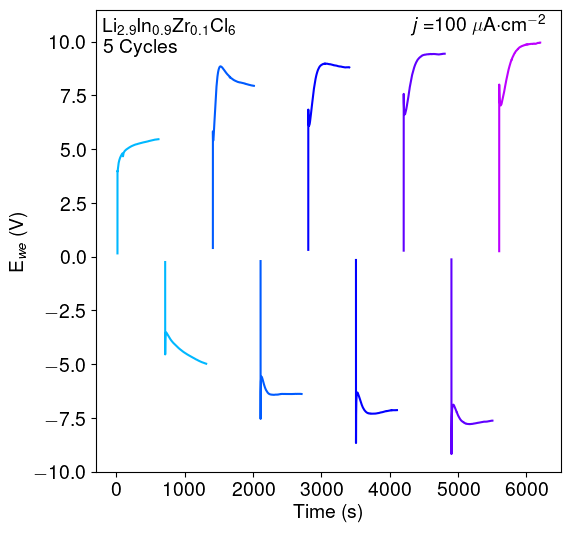

In [30]:
# generates plot
fig, cp_plot = plt.subplots(1, 1, figsize=(6,6))

for i in CP_cycles_pos:
    cp_plot.plot(CP_cycles_pos[i]["time"], CP_cycles_pos[i]["<Ewe>"], color = colors_cp[i].hex)
for i in CP_cycles_neg:
    cp_plot.plot(CP_cycles_neg[i]["time"], CP_cycles_neg[i]["<Ewe>"], color = colors_cp[i].hex)

cp_plot.set_ylabel("E$_{we}$ (V)")
cp_plot.set_xlabel("Time (s)")

if x_ax is not None:
    cp_plot.set_xlim(x_ax)
cp_plot.set_ylim(y_ax)

cp_plot.text(title_pos[0], title_pos[1], title)
cp_plot.text(num_cycles_xy[0], num_cycles_xy[1], str(num_cycles_pos) + " Cycles")
cp_plot.text(curr_dens_pos[0], curr_dens_pos[1], "$j=$" + str(curr_dens) + " $\mu$A$\cdot$cm$^{-2}$")

if savePNG == True:
    plt.savefig(save_dir + fn + ".png", bbox_inches='tight', dpi=1000)  